In [1]:
import tensorflow as tf
import os
import numpy as np
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm

2024-05-15 13:08:41.958559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 13:08:41.958663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 13:08:42.094458: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os
# Define the path for the empty folder
folder_path = '/kaggle/working/empty_folderf3/'

# Create the empty folder
os.makedirs(folder_path, exist_ok=True)
save_dir = ('/kaggle/working/empty_folderf3')


In [3]:
from sklearn.model_selection import train_test_split

# Split dataset into training and validation sets
train_dir = '/kaggle/input/gtsrb-train/Train'
train_data, val_data = train_test_split(os.listdir(train_dir), test_size=0.2, random_state=42)

# Create training and validation datasets
train_dataset = keras.preprocessing.image_dataset_from_directory(
    directory=train_dir, 
    labels='inferred',  # Use inferred labels from directory structure
    label_mode='categorical', 
    image_size=(64, 64), 
    batch_size=64,
    shuffle=True,
    validation_split=0.2,  # Percentage of data to use for validation
    subset="training",
    seed=42  # Specify seed for reproducibility
).map(lambda x, y: (x/255.0, y))  # Normalize the pixel values to [0, 1]

val_dataset = keras.preprocessing.image_dataset_from_directory(
    directory=train_dir, 
    labels='inferred',  # Use inferred labels from directory structure
    label_mode='categorical', 
    image_size=(64, 64), 
    batch_size=64,
    shuffle=True,
    validation_split=0.2,  # Percentage of data to use for validation
    subset="validation",
    seed=42  # Specify seed for reproducibility
).map(lambda x, y: (x/255.0, y))  # Normalize the pixel values to [0, 1])


Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [4]:
#nnnnnnneeeeewwwwwwwwww   mmmmooodeeel

In [5]:
latent_dim = 128

# Encoder
encoder = keras.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2D(256, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2D(512, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Flatten(),
    layers.Dense(latent_dim)  # Latent representation
])

# Decoder
decoder = keras.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(8*8*512),
    layers.Reshape((8, 8, 512)),
    layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(0.2),
    layers.Conv2DTranspose(3, kernel_size=4,  padding="same", activation="tanh"),
])

# Full autoencoder model
autoencoder = keras.Sequential([
    layers.Input(shape=(64, 64, 3)),
    encoder,
    decoder
])


In [6]:
from tensorflow.keras import layers, models, optimizers

In [7]:
import tensorflow as tf

class CustomModel(tf.keras.Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        
        # Define layers
        self.conv1 = tf.keras.layers.Conv2D(250, kernel_size=7, activation='relu', input_shape=(48, 48, 3))
        self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=2)
        self.norm1 = tf.keras.layers.BatchNormalization()
        
        self.conv2 = tf.keras.layers.Conv2D(300, kernel_size=4, activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=2)
        self.norm2 = tf.keras.layers.BatchNormalization()
        
        self.conv3 = tf.keras.layers.Conv2D(350, kernel_size=4, activation='relu')
        self.pool3 = tf.keras.layers.MaxPooling2D(pool_size=2)
        self.norm3 = tf.keras.layers.BatchNormalization()
        
        self.conv4 = tf.keras.layers.Conv2D(400, kernel_size=4, activation='relu')
        self.pool4 = tf.keras.layers.MaxPooling2D(pool_size=2)
        self.norm4 = tf.keras.layers.BatchNormalization()
        
        self.flatten = tf.keras.layers.Flatten()
    
        self.fc1 = tf.keras.layers.Dense(400, activation='relu')
        self.dropout1 = tf.keras.layers.Dropout(0.5)  # Dropout layer
        self.fc2 = tf.keras.layers.Dense(200, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.25)  # Dropout layer
        self.fc3 = tf.keras.layers.Dense(43, activation='softmax')
    
    def call(self, inputs):
        # Forward pass
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.norm1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.norm2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.norm3(x)
        x = self.conv4(x)
        x = self.pool4(x)
        x = self.norm4(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout1(x)  # Dropout layer
        x = self.fc2(x)
        x = self.dropout2(x)  # Dropout layer
        x = self.fc3(x)
        return x

# Create an instance of the model
discriminator = CustomModel()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# Loss functions
loss_fn_auto = tf.keras.losses.MeanSquaredError()
loss_fn_disc = tf.keras.losses.CategoricalCrossentropy()

# Optimizers
opt_autoencoder = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
opt_disc = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)


# Compile the autoencoder model
autoencoder.compile(optimizer=opt_autoencoder, loss=loss_fn_auto)

# Compile the discriminator model
discriminator.compile(optimizer=opt_disc, loss=loss_fn_disc, metrics=['accuracy'])

In [9]:
autoencoder_losses_epoch = []
discriminator_losses_epoch = []
discriminator_acc_epoch = []
val_autoencoder_losses_epoch = []
val_discriminator_losses_epoch = []
val_discriminator_acc_epoch = []

for epoch in range(100):
    # Initialize epoch-wise metrics
    epoch_autoencoder_losses = []
    epoch_discriminator_losses = []
    epoch_discriminator_acc = []
    epoch_val_autoencoder_losses = []
    epoch_val_discriminator_losses = []
    epoch_val_discriminator_acc = []

    # Training loop
    for idx, (batch_real, batch_label) in enumerate(tqdm(train_dataset)):
        # Training steps
        with tf.GradientTape() as autoencoder_tape, tf.GradientTape() as disc_tape:
            latent_representation = encoder(batch_real)
            generated_image = decoder(latent_representation)
            loss_autoencoder = loss_fn_auto(batch_real, generated_image)
            
            fake = generated_image
            loss_disc_real = loss_fn_disc(batch_label, discriminator(batch_real))
            loss_disc_fake = loss_fn_disc(batch_label, discriminator(fake))
            loss_disc = (loss_disc_real + loss_disc_fake) / 2

        grads_autoencoder = autoencoder_tape.gradient(loss_autoencoder, autoencoder.trainable_weights)
        opt_autoencoder.apply_gradients(zip(grads_autoencoder, autoencoder.trainable_weights))

        grads_discriminator = disc_tape.gradient(loss_disc, discriminator.trainable_weights)
        opt_disc.apply_gradients(zip(grads_discriminator, discriminator.trainable_weights))

        # Store batch-wise metrics
        epoch_autoencoder_losses.append(loss_autoencoder.numpy())
        epoch_discriminator_losses.append(loss_disc.numpy())
        epoch_discriminator_acc.append(tf.reduce_mean(tf.keras.metrics.categorical_accuracy(batch_label, discriminator(fake))).numpy())
        if idx % 200 == 0:
            img = tf.keras.preprocessing.image.array_to_img(fake[0])
            img.save(f"{save_dir}/generated_img_epoch_{epoch}_batch_{idx}.png")

    # Validation loop
    for val_batch_real, val_batch_label in val_dataset:
        val_latent_representation = encoder(val_batch_real)
        val_generated_image = decoder(val_latent_representation)
        val_loss_autoencoder = loss_fn_auto(val_batch_real, val_generated_image)
        val_loss_disc_real = loss_fn_disc(val_batch_label, discriminator(val_batch_real))
        val_loss_disc_fake = loss_fn_disc(val_batch_label, discriminator(val_generated_image))
        val_loss_disc = (val_loss_disc_real + val_loss_disc_fake) / 2

        # Calculate accuracy
        val_discriminator_accuracy = tf.reduce_mean(tf.keras.metrics.categorical_accuracy(val_batch_label, discriminator(val_generated_image)))

        # Store validation metrics
        epoch_val_autoencoder_losses.append(val_loss_autoencoder.numpy())
        epoch_val_discriminator_losses.append(val_loss_disc.numpy())
        epoch_val_discriminator_acc.append(val_discriminator_accuracy.numpy())

    # Calculate epoch-wise averages and append to the lists
    avg_autoencoder_loss = np.mean(epoch_autoencoder_losses)
    avg_discriminator_loss = np.mean(epoch_discriminator_losses)
    avg_discriminator_acc = np.mean(epoch_discriminator_acc)
    avg_val_autoencoder_loss = np.mean(epoch_val_autoencoder_losses)
    avg_val_discriminator_loss = np.mean(epoch_val_discriminator_losses)
    avg_val_discriminator_acc = np.mean(epoch_val_discriminator_acc)

    autoencoder_losses_epoch.append(avg_autoencoder_loss)
    discriminator_losses_epoch.append(avg_discriminator_loss)
    discriminator_acc_epoch.append(avg_discriminator_acc)
    val_autoencoder_losses_epoch.append(avg_val_autoencoder_loss)
    val_discriminator_losses_epoch.append(avg_val_discriminator_loss)
    val_discriminator_acc_epoch.append(avg_val_discriminator_acc)

    # Print epoch-wise metrics
    print(f"Epoch {epoch}, Autoencoder Loss: {avg_autoencoder_loss}, Discriminator Loss: {avg_discriminator_loss}, Discriminator Accuracy: {avg_discriminator_acc}")
    print(f"Validation - Autoencoder Loss: {avg_val_autoencoder_loss}, Discriminator Loss: {avg_val_discriminator_loss}, Discriminator Accuracy: {avg_val_discriminator_acc}")


100%|██████████| 491/491 [02:53<00:00,  2.83it/s]


Epoch 0, Autoencoder Loss: 0.02458610013127327, Discriminator Loss: 2.710495948791504, Discriminator Accuracy: 0.178016796708107
Validation - Autoencoder Loss: 0.01686677522957325, Discriminator Loss: 1.8508998155593872, Discriminator Accuracy: 0.3015059232711792


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 1, Autoencoder Loss: 0.01172975730150938, Discriminator Loss: 0.9184957146644592, Discriminator Accuracy: 0.6963785886764526
Validation - Autoencoder Loss: 0.009562941268086433, Discriminator Loss: 0.5478211045265198, Discriminator Accuracy: 0.7345482707023621


100%|██████████| 491/491 [02:37<00:00,  3.11it/s]


Epoch 2, Autoencoder Loss: 0.008055201731622219, Discriminator Loss: 0.32759714126586914, Discriminator Accuracy: 0.9203475117683411
Validation - Autoencoder Loss: 0.00750613072887063, Discriminator Loss: 0.28693631291389465, Discriminator Accuracy: 0.8604220151901245


100%|██████████| 491/491 [02:38<00:00,  3.11it/s]


Epoch 3, Autoencoder Loss: 0.0064698196947574615, Discriminator Loss: 0.15316243469715118, Discriminator Accuracy: 0.9771512150764465
Validation - Autoencoder Loss: 0.0059995343908667564, Discriminator Loss: 0.2665494978427887, Discriminator Accuracy: 0.9045023322105408


100%|██████████| 491/491 [02:38<00:00,  3.10it/s]


Epoch 4, Autoencoder Loss: 0.005379173904657364, Discriminator Loss: 0.082490935921669, Discriminator Accuracy: 0.9936672449111938
Validation - Autoencoder Loss: 0.00509137287735939, Discriminator Loss: 0.09456222504377365, Discriminator Accuracy: 0.9561814665794373


100%|██████████| 491/491 [02:37<00:00,  3.12it/s]


Epoch 5, Autoencoder Loss: 0.0062394822016358376, Discriminator Loss: 0.1542145162820816, Discriminator Accuracy: 0.9768329858779907
Validation - Autoencoder Loss: 0.004950961098074913, Discriminator Loss: 0.07693600654602051, Discriminator Accuracy: 0.9672486782073975


100%|██████████| 491/491 [02:38<00:00,  3.10it/s]


Epoch 6, Autoencoder Loss: 0.004465492442250252, Discriminator Loss: 0.03863931819796562, Discriminator Accuracy: 0.9983451962471008
Validation - Autoencoder Loss: 0.00434876699000597, Discriminator Loss: 0.12636904418468475, Discriminator Accuracy: 0.9526322484016418


100%|██████████| 491/491 [02:38<00:00,  3.09it/s]


Epoch 7, Autoencoder Loss: 0.004088531713932753, Discriminator Loss: 0.025964489206671715, Discriminator Accuracy: 0.9993317127227783
Validation - Autoencoder Loss: 0.004465772304683924, Discriminator Loss: 0.06841599196195602, Discriminator Accuracy: 0.9691311120986938


100%|██████████| 491/491 [02:37<00:00,  3.11it/s]


Epoch 8, Autoencoder Loss: 0.003823831444606185, Discriminator Loss: 0.019083872437477112, Discriminator Accuracy: 0.999586284160614
Validation - Autoencoder Loss: 0.004800808150321245, Discriminator Loss: 0.0473562590777874, Discriminator Accuracy: 0.9829853177070618


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 9, Autoencoder Loss: 0.003624388249590993, Discriminator Loss: 0.017493898048996925, Discriminator Accuracy: 0.9992998838424683
Validation - Autoencoder Loss: 0.0051510147750377655, Discriminator Loss: 0.04643384739756584, Discriminator Accuracy: 0.9822154641151428


100%|██████████| 491/491 [02:36<00:00,  3.14it/s]


Epoch 10, Autoencoder Loss: 0.003422338981181383, Discriminator Loss: 0.01578119955956936, Discriminator Accuracy: 0.9995226860046387
Validation - Autoencoder Loss: 0.0033827077131718397, Discriminator Loss: 0.04231935739517212, Discriminator Accuracy: 0.9820961356163025


100%|██████████| 491/491 [02:37<00:00,  3.13it/s]


Epoch 11, Autoencoder Loss: 0.003694236744195223, Discriminator Loss: 0.02874101884663105, Discriminator Accuracy: 0.9968177080154419
Validation - Autoencoder Loss: 0.003295712638646364, Discriminator Loss: 0.05062023550271988, Discriminator Accuracy: 0.9800558686256409


100%|██████████| 491/491 [02:35<00:00,  3.15it/s]


Epoch 12, Autoencoder Loss: 0.003098414046689868, Discriminator Loss: 0.010491885244846344, Discriminator Accuracy: 0.9998726844787598
Validation - Autoencoder Loss: 0.0033985613845288754, Discriminator Loss: 0.04692365601658821, Discriminator Accuracy: 0.9828506112098694


100%|██████████| 491/491 [02:35<00:00,  3.17it/s]


Epoch 13, Autoencoder Loss: 0.0029941576067358255, Discriminator Loss: 0.010580810718238354, Discriminator Accuracy: 0.9997135996818542
Validation - Autoencoder Loss: 0.0031974962912499905, Discriminator Loss: 0.058279071003198624, Discriminator Accuracy: 0.9780310392379761


100%|██████████| 491/491 [02:34<00:00,  3.17it/s]


Epoch 14, Autoencoder Loss: 0.0029063145630061626, Discriminator Loss: 0.012118215672671795, Discriminator Accuracy: 0.9997454285621643
Validation - Autoencoder Loss: 0.003072666237130761, Discriminator Loss: 0.036981526762247086, Discriminator Accuracy: 0.9902338981628418


100%|██████████| 491/491 [02:34<00:00,  3.19it/s]


Epoch 15, Autoencoder Loss: 0.0027903886511921883, Discriminator Loss: 0.008286810480058193, Discriminator Accuracy: 0.9997772574424744
Validation - Autoencoder Loss: 0.0041652400977909565, Discriminator Loss: 0.05094815418124199, Discriminator Accuracy: 0.9806987643241882


100%|██████████| 491/491 [02:37<00:00,  3.12it/s]


Epoch 16, Autoencoder Loss: 0.002728142775595188, Discriminator Loss: 0.012980595231056213, Discriminator Accuracy: 0.9997454285621643
Validation - Autoencoder Loss: 0.0031691440381109715, Discriminator Loss: 0.03757317364215851, Discriminator Accuracy: 0.9836205244064331


100%|██████████| 491/491 [02:34<00:00,  3.18it/s]


Epoch 17, Autoencoder Loss: 0.002686450956389308, Discriminator Loss: 0.013749092817306519, Discriminator Accuracy: 0.9992680549621582
Validation - Autoencoder Loss: 0.002850305289030075, Discriminator Loss: 0.025797514244914055, Discriminator Accuracy: 0.9894639849662781


100%|██████████| 491/491 [02:35<00:00,  3.15it/s]


Epoch 18, Autoencoder Loss: 0.002508952049538493, Discriminator Loss: 0.002313746837899089, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0028604604303836823, Discriminator Loss: 0.03086794726550579, Discriminator Accuracy: 0.9883130192756653


100%|██████████| 491/491 [02:34<00:00,  3.17it/s]


Epoch 19, Autoencoder Loss: 0.0024554880801588297, Discriminator Loss: 0.00784916803240776, Discriminator Accuracy: 0.9997135996818542
Validation - Autoencoder Loss: 0.0036753665190190077, Discriminator Loss: 0.0501054972410202, Discriminator Accuracy: 0.9805639982223511


100%|██████████| 491/491 [02:36<00:00,  3.14it/s]


Epoch 20, Autoencoder Loss: 0.0024121026508510113, Discriminator Loss: 0.00530108530074358, Discriminator Accuracy: 0.9998726844787598
Validation - Autoencoder Loss: 0.004118653014302254, Discriminator Loss: 0.05008307099342346, Discriminator Accuracy: 0.9767530560493469


100%|██████████| 491/491 [02:34<00:00,  3.17it/s]


Epoch 21, Autoencoder Loss: 0.0023105721920728683, Discriminator Loss: 0.009438510984182358, Discriminator Accuracy: 0.9996817708015442
Validation - Autoencoder Loss: 0.0028172337915748358, Discriminator Loss: 0.035211555659770966, Discriminator Accuracy: 0.9884400367736816


100%|██████████| 491/491 [02:37<00:00,  3.11it/s]


Epoch 22, Autoencoder Loss: 0.0022773416712880135, Discriminator Loss: 0.0029480864759534597, Discriminator Accuracy: 0.9999681711196899
Validation - Autoencoder Loss: 0.0030049546621739864, Discriminator Loss: 0.11483724415302277, Discriminator Accuracy: 0.9766260385513306


100%|██████████| 491/491 [02:38<00:00,  3.10it/s]


Epoch 23, Autoencoder Loss: 0.002183253411203623, Discriminator Loss: 0.007477628067135811, Discriminator Accuracy: 0.9998409152030945
Validation - Autoencoder Loss: 0.0027234184090048075, Discriminator Loss: 0.03765671327710152, Discriminator Accuracy: 0.9880589246749878


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 24, Autoencoder Loss: 0.002145696897059679, Discriminator Loss: 0.007615531329065561, Discriminator Accuracy: 0.999554455280304
Validation - Autoencoder Loss: 0.002661621430888772, Discriminator Loss: 0.7108976244926453, Discriminator Accuracy: 0.8448124527931213


100%|██████████| 491/491 [02:34<00:00,  3.17it/s]


Epoch 25, Autoencoder Loss: 0.0021141895558685064, Discriminator Loss: 0.010467316955327988, Discriminator Accuracy: 0.9998409152030945
Validation - Autoencoder Loss: 0.0036673222202807665, Discriminator Loss: 0.04824149236083031, Discriminator Accuracy: 0.9782851338386536


100%|██████████| 491/491 [02:34<00:00,  3.18it/s]


Epoch 26, Autoencoder Loss: 0.002072657225653529, Discriminator Loss: 0.002788507379591465, Discriminator Accuracy: 0.9999363422393799
Validation - Autoencoder Loss: 0.002675949363037944, Discriminator Loss: 0.03383950889110565, Discriminator Accuracy: 0.9899644255638123


100%|██████████| 491/491 [02:36<00:00,  3.14it/s]


Epoch 27, Autoencoder Loss: 0.0019880488980561495, Discriminator Loss: 0.0032301193568855524, Discriminator Accuracy: 0.9999681711196899
Validation - Autoencoder Loss: 0.002718850737437606, Discriminator Loss: 0.029323941096663475, Discriminator Accuracy: 0.9914888143539429


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 28, Autoencoder Loss: 0.0019567180424928665, Discriminator Loss: 0.009356178343296051, Discriminator Accuracy: 0.9994590282440186
Validation - Autoencoder Loss: 0.0028351591899991035, Discriminator Loss: 0.18836839497089386, Discriminator Accuracy: 0.9664711356163025


100%|██████████| 491/491 [02:35<00:00,  3.17it/s]


Epoch 29, Autoencoder Loss: 0.0019283813890069723, Discriminator Loss: 0.005380651447921991, Discriminator Accuracy: 0.9998090863227844
Validation - Autoencoder Loss: 0.002859514206647873, Discriminator Loss: 0.02580629289150238, Discriminator Accuracy: 0.9912347793579102


100%|██████████| 491/491 [02:35<00:00,  3.15it/s]


Epoch 30, Autoencoder Loss: 0.001910522347316146, Discriminator Loss: 0.004281311761587858, Discriminator Accuracy: 0.9997772574424744
Validation - Autoencoder Loss: 0.0025522527284920216, Discriminator Loss: 0.030051225796341896, Discriminator Accuracy: 0.9898374080657959


100%|██████████| 491/491 [02:35<00:00,  3.17it/s]


Epoch 31, Autoencoder Loss: 0.0018188819522038102, Discriminator Loss: 0.0023209741339087486, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002651178976520896, Discriminator Loss: 0.030478760600090027, Discriminator Accuracy: 0.991107702255249


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 32, Autoencoder Loss: 0.0018072202801704407, Discriminator Loss: 0.003590431297197938, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0027774989139288664, Discriminator Loss: 0.04875679686665535, Discriminator Accuracy: 0.9832317233085632


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 33, Autoencoder Loss: 0.0017861035885289311, Discriminator Loss: 0.005443055182695389, Discriminator Accuracy: 0.9999363422393799
Validation - Autoencoder Loss: 0.0029188115149736404, Discriminator Loss: 0.023627551272511482, Discriminator Accuracy: 0.991107702255249


100%|██████████| 491/491 [02:34<00:00,  3.17it/s]


Epoch 34, Autoencoder Loss: 0.0017376795876771212, Discriminator Loss: 0.0006112753180786967, Discriminator Accuracy: 0.9999681711196899
Validation - Autoencoder Loss: 0.0028301910497248173, Discriminator Loss: 0.023528939113020897, Discriminator Accuracy: 0.9925050735473633


100%|██████████| 491/491 [02:34<00:00,  3.17it/s]


Epoch 35, Autoencoder Loss: 0.0017109453910961747, Discriminator Loss: 6.263799878070131e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0027900340501219034, Discriminator Loss: 0.02371053211390972, Discriminator Accuracy: 0.9930132031440735


100%|██████████| 491/491 [02:34<00:00,  3.19it/s]


Epoch 36, Autoencoder Loss: 0.001697274623438716, Discriminator Loss: 0.00920457486063242, Discriminator Accuracy: 0.9996181130409241
Validation - Autoencoder Loss: 0.0026371278800070286, Discriminator Loss: 0.03928951174020767, Discriminator Accuracy: 0.9866693019866943


100%|██████████| 491/491 [02:34<00:00,  3.18it/s]


Epoch 37, Autoencoder Loss: 0.0026846143882721663, Discriminator Loss: 0.024542374536395073, Discriminator Accuracy: 0.9950674772262573
Validation - Autoencoder Loss: 0.013810782693326473, Discriminator Loss: 1.0531657934188843, Discriminator Accuracy: 0.5599477887153625


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 38, Autoencoder Loss: 0.0024869912303984165, Discriminator Loss: 0.0186064001172781, Discriminator Accuracy: 0.9981542825698853
Validation - Autoencoder Loss: 0.0027286489494144917, Discriminator Loss: 0.023827088996767998, Discriminator Accuracy: 0.9918699264526367


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 39, Autoencoder Loss: 0.0016946052201092243, Discriminator Loss: 0.00043935238500125706, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0027229110710322857, Discriminator Loss: 0.023294590413570404, Discriminator Accuracy: 0.9937754273414612


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 40, Autoencoder Loss: 0.0016074333107098937, Discriminator Loss: 0.0004073258023709059, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002601366024464369, Discriminator Loss: 0.0215622466057539, Discriminator Accuracy: 0.9937754273414612


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 41, Autoencoder Loss: 0.0015761262038722634, Discriminator Loss: 8.099249680526555e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026510704774409533, Discriminator Loss: 0.022099409252405167, Discriminator Accuracy: 0.9942835569381714


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 42, Autoencoder Loss: 0.0015559244202449918, Discriminator Loss: 2.616206074890215e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026205244939774275, Discriminator Loss: 0.023289762437343597, Discriminator Accuracy: 0.9937754273414612


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 43, Autoencoder Loss: 0.0015599944163113832, Discriminator Loss: 0.006693651899695396, Discriminator Accuracy: 0.9996499419212341
Validation - Autoencoder Loss: 0.0026661702431738377, Discriminator Loss: 0.037175197154283524, Discriminator Accuracy: 0.9862881898880005


100%|██████████| 491/491 [02:34<00:00,  3.17it/s]


Epoch 44, Autoencoder Loss: 0.001541173318400979, Discriminator Loss: 0.001137558720074594, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0025368023198097944, Discriminator Loss: 0.023333296179771423, Discriminator Accuracy: 0.9928861856460571


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 45, Autoencoder Loss: 0.0015331630129367113, Discriminator Loss: 0.0022057730238884687, Discriminator Accuracy: 0.9999681711196899
Validation - Autoencoder Loss: 0.0025812729727476835, Discriminator Loss: 0.02288917824625969, Discriminator Accuracy: 0.9927591681480408


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 46, Autoencoder Loss: 0.001517905038781464, Discriminator Loss: 0.0010118552017956972, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002745372010394931, Discriminator Loss: 0.02148624323308468, Discriminator Accuracy: 0.9928861856460571


100%|██████████| 491/491 [02:34<00:00,  3.17it/s]


Epoch 47, Autoencoder Loss: 0.0015160607872530818, Discriminator Loss: 0.0007345724734477699, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026217992417514324, Discriminator Loss: 0.0233086459338665, Discriminator Accuracy: 0.9922664165496826


100%|██████████| 491/491 [02:33<00:00,  3.20it/s]


Epoch 48, Autoencoder Loss: 0.001490153488703072, Discriminator Loss: 0.00010162561375182122, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002627672627568245, Discriminator Loss: 0.025213759392499924, Discriminator Accuracy: 0.9927591681480408


100%|██████████| 491/491 [02:35<00:00,  3.15it/s]


Epoch 49, Autoencoder Loss: 0.001477520214393735, Discriminator Loss: 0.010957111604511738, Discriminator Accuracy: 0.9997135996818542
Validation - Autoencoder Loss: 0.002892296062782407, Discriminator Loss: 0.03802117332816124, Discriminator Accuracy: 0.9861611723899841


100%|██████████| 491/491 [02:34<00:00,  3.18it/s]


Epoch 50, Autoencoder Loss: 0.0014702037442475557, Discriminator Loss: 0.0014499810058623552, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026085595600306988, Discriminator Loss: 0.02345387078821659, Discriminator Accuracy: 0.9922510385513306


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 51, Autoencoder Loss: 0.0014478482771664858, Discriminator Loss: 0.0005435544881038368, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026465689297765493, Discriminator Loss: 0.02438862808048725, Discriminator Accuracy: 0.9927668571472168


100%|██████████| 491/491 [02:35<00:00,  3.15it/s]


Epoch 52, Autoencoder Loss: 0.0014397408813238144, Discriminator Loss: 0.00025637171347625554, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0030464634764939547, Discriminator Loss: 0.029984718188643456, Discriminator Accuracy: 0.9895910024642944


100%|██████████| 491/491 [02:34<00:00,  3.19it/s]


Epoch 53, Autoencoder Loss: 0.001422595465555787, Discriminator Loss: 0.005135823506861925, Discriminator Accuracy: 0.9998409152030945
Validation - Autoencoder Loss: 0.0028025724459439516, Discriminator Loss: 0.059112612158060074, Discriminator Accuracy: 0.9777693152427673


100%|██████████| 491/491 [02:34<00:00,  3.18it/s]


Epoch 54, Autoencoder Loss: 0.0014119029510766268, Discriminator Loss: 0.0030423388816416264, Discriminator Accuracy: 0.9999363422393799
Validation - Autoencoder Loss: 0.004775587003678083, Discriminator Loss: 0.05162461847066879, Discriminator Accuracy: 0.980952799320221


100%|██████████| 491/491 [02:35<00:00,  3.15it/s]


Epoch 55, Autoencoder Loss: 0.0020174728706479073, Discriminator Loss: 0.019665151834487915, Discriminator Accuracy: 0.9970404505729675
Validation - Autoencoder Loss: 0.002628572750836611, Discriminator Loss: 0.02422669343650341, Discriminator Accuracy: 0.9925050735473633


100%|██████████| 491/491 [02:33<00:00,  3.19it/s]


Epoch 56, Autoencoder Loss: 0.0013536411570385098, Discriminator Loss: 5.937164678471163e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026163437869399786, Discriminator Loss: 0.022232918068766594, Discriminator Accuracy: 0.9936560392379761


100%|██████████| 491/491 [02:36<00:00,  3.14it/s]


Epoch 57, Autoencoder Loss: 0.0013369601219892502, Discriminator Loss: 3.107286829617806e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.00267559546045959, Discriminator Loss: 0.022515656426548958, Discriminator Accuracy: 0.9935213327407837


100%|██████████| 491/491 [02:39<00:00,  3.09it/s]


Epoch 58, Autoencoder Loss: 0.0013555045006796718, Discriminator Loss: 9.035191033035517e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0029042046517133713, Discriminator Loss: 0.024597318843007088, Discriminator Accuracy: 0.9930132031440735


100%|██████████| 491/491 [02:37<00:00,  3.13it/s]


Epoch 59, Autoencoder Loss: 0.0013553581666201353, Discriminator Loss: 1.4708174603583757e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.00263594975695014, Discriminator Loss: 0.02370069921016693, Discriminator Accuracy: 0.9939024448394775


100%|██████████| 491/491 [02:38<00:00,  3.10it/s]


Epoch 60, Autoencoder Loss: 0.001338297501206398, Discriminator Loss: 7.663933502044529e-06, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026565741281956434, Discriminator Loss: 0.024787437170743942, Discriminator Accuracy: 0.9944105744361877


100%|██████████| 491/491 [02:37<00:00,  3.12it/s]


Epoch 61, Autoencoder Loss: 0.0013340461300686002, Discriminator Loss: 5.4495058066095226e-06, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002674833172932267, Discriminator Loss: 0.02528412640094757, Discriminator Accuracy: 0.9940294623374939


100%|██████████| 491/491 [02:39<00:00,  3.09it/s]


Epoch 62, Autoencoder Loss: 0.0013339585857465863, Discriminator Loss: 0.009589715860784054, Discriminator Accuracy: 0.999586284160614
Validation - Autoencoder Loss: 0.002718545263633132, Discriminator Loss: 0.04072682559490204, Discriminator Accuracy: 0.9862805008888245


100%|██████████| 491/491 [02:37<00:00,  3.12it/s]


Epoch 63, Autoencoder Loss: 0.0013052922440692782, Discriminator Loss: 0.0010695481905713677, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026428080163896084, Discriminator Loss: 0.020507361739873886, Discriminator Accuracy: 0.9931402206420898


100%|██████████| 491/491 [02:38<00:00,  3.09it/s]


Epoch 64, Autoencoder Loss: 0.0013012572890147567, Discriminator Loss: 2.061441045952961e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026524169370532036, Discriminator Loss: 0.01965061016380787, Discriminator Accuracy: 0.9939024448394775


100%|██████████| 491/491 [02:39<00:00,  3.08it/s]


Epoch 65, Autoencoder Loss: 0.0012924297479912639, Discriminator Loss: 0.00021454691886901855, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0028035289142280817, Discriminator Loss: 0.03416837751865387, Discriminator Accuracy: 0.9881860017776489


100%|██████████| 491/491 [02:37<00:00,  3.12it/s]


Epoch 66, Autoencoder Loss: 0.0012846658937633038, Discriminator Loss: 0.0051774620078504086, Discriminator Accuracy: 0.9999363422393799
Validation - Autoencoder Loss: 0.0025847475044429302, Discriminator Loss: 0.02380521595478058, Discriminator Accuracy: 0.9904802441596985


100%|██████████| 491/491 [02:36<00:00,  3.14it/s]


Epoch 67, Autoencoder Loss: 0.0012784259160980582, Discriminator Loss: 0.0016692249337211251, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026943436823785305, Discriminator Loss: 0.024967631325125694, Discriminator Accuracy: 0.9909883737564087


100%|██████████| 491/491 [02:36<00:00,  3.14it/s]


Epoch 68, Autoencoder Loss: 0.0012675144243985415, Discriminator Loss: 0.0004763818287756294, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002674177521839738, Discriminator Loss: 0.02311297506093979, Discriminator Accuracy: 0.9927591681480408


100%|██████████| 491/491 [02:36<00:00,  3.15it/s]


Epoch 69, Autoencoder Loss: 0.001262347912415862, Discriminator Loss: 0.0009068396175280213, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.00258257775567472, Discriminator Loss: 0.024781400337815285, Discriminator Accuracy: 0.9917429089546204


100%|██████████| 491/491 [02:41<00:00,  3.03it/s]


Epoch 70, Autoencoder Loss: 0.0012413900112733245, Discriminator Loss: 5.675757347489707e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002642993349581957, Discriminator Loss: 0.022036237642169, Discriminator Accuracy: 0.9931402206420898


100%|██████████| 491/491 [03:21<00:00,  2.43it/s]


Epoch 71, Autoencoder Loss: 0.0012362527195364237, Discriminator Loss: 6.376975761668291e-06, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0028787918854504824, Discriminator Loss: 0.021562349051237106, Discriminator Accuracy: 0.9935213327407837


100%|██████████| 491/491 [02:46<00:00,  2.96it/s]


Epoch 72, Autoencoder Loss: 0.0012320316163823009, Discriminator Loss: 0.004931123927235603, Discriminator Accuracy: 0.9999045133590698
Validation - Autoencoder Loss: 0.0026806192472577095, Discriminator Loss: 0.02562856301665306, Discriminator Accuracy: 0.9901068210601807


100%|██████████| 491/491 [02:42<00:00,  3.03it/s]


Epoch 73, Autoencoder Loss: 0.0012508120853453875, Discriminator Loss: 0.001654445193707943, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026421924121677876, Discriminator Loss: 0.028086429461836815, Discriminator Accuracy: 0.9895833134651184


100%|██████████| 491/491 [02:37<00:00,  3.12it/s]


Epoch 74, Autoencoder Loss: 0.0012006203178316355, Discriminator Loss: 0.0008881186950020492, Discriminator Accuracy: 0.9999681711196899
Validation - Autoencoder Loss: 0.0026073423214256763, Discriminator Loss: 0.0275118388235569, Discriminator Accuracy: 0.9913617968559265


100%|██████████| 491/491 [02:40<00:00,  3.07it/s]


Epoch 75, Autoencoder Loss: 0.0012040414148941636, Discriminator Loss: 0.0027403817512094975, Discriminator Accuracy: 0.9999045133590698
Validation - Autoencoder Loss: 0.0025505523663014174, Discriminator Loss: 0.03680339455604553, Discriminator Accuracy: 0.9888288378715515


100%|██████████| 491/491 [02:39<00:00,  3.08it/s]


Epoch 76, Autoencoder Loss: 0.0012025964679196477, Discriminator Loss: 0.0007066859980113804, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002643173560500145, Discriminator Loss: 0.027280235663056374, Discriminator Accuracy: 0.9925050735473633


100%|██████████| 491/491 [02:37<00:00,  3.12it/s]


Epoch 77, Autoencoder Loss: 0.0011918989475816488, Discriminator Loss: 1.2025546311633661e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002548846183344722, Discriminator Loss: 0.026492085307836533, Discriminator Accuracy: 0.9933943152427673


100%|██████████| 491/491 [02:37<00:00,  3.12it/s]


Epoch 78, Autoencoder Loss: 0.00118698098231107, Discriminator Loss: 5.834847797814291e-06, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0025971687864512205, Discriminator Loss: 0.026762163266539574, Discriminator Accuracy: 0.9931402206420898


100%|██████████| 491/491 [02:37<00:00,  3.12it/s]


Epoch 79, Autoencoder Loss: 0.001179198268800974, Discriminator Loss: 4.12572308050585e-06, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0027257974725216627, Discriminator Loss: 0.026853865012526512, Discriminator Accuracy: 0.9930132031440735


100%|██████████| 491/491 [02:36<00:00,  3.15it/s]


Epoch 80, Autoencoder Loss: 0.0011772930156439543, Discriminator Loss: 6.926497007953003e-06, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002720521530136466, Discriminator Loss: 0.02839060127735138, Discriminator Accuracy: 0.9928861856460571


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 81, Autoencoder Loss: 0.001168289571069181, Discriminator Loss: 0.006434741895645857, Discriminator Accuracy: 0.9997135996818542
Validation - Autoencoder Loss: 0.002729262923821807, Discriminator Loss: 0.1239924505352974, Discriminator Accuracy: 0.9691541790962219


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 82, Autoencoder Loss: 0.0011577747063711286, Discriminator Loss: 0.003368254052475095, Discriminator Accuracy: 0.9998726844787598
Validation - Autoencoder Loss: 0.002717221388593316, Discriminator Loss: 0.0284475926309824, Discriminator Accuracy: 0.9907266497612


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 83, Autoencoder Loss: 0.0011475766077637672, Discriminator Loss: 6.860985740786418e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002618925180286169, Discriminator Loss: 0.02828027680516243, Discriminator Accuracy: 0.9919969439506531


100%|██████████| 491/491 [02:35<00:00,  3.16it/s]


Epoch 84, Autoencoder Loss: 0.0011492884950712323, Discriminator Loss: 1.0623765774653293e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026098820380866528, Discriminator Loss: 0.02505326271057129, Discriminator Accuracy: 0.9928861856460571


100%|██████████| 491/491 [02:35<00:00,  3.17it/s]


Epoch 85, Autoencoder Loss: 0.0011429113801568747, Discriminator Loss: 6.098102858231869e-06, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026938270311802626, Discriminator Loss: 0.027107924222946167, Discriminator Accuracy: 0.9913694858551025


100%|██████████| 491/491 [02:33<00:00,  3.19it/s]


Epoch 86, Autoencoder Loss: 0.0011424865806475282, Discriminator Loss: 0.001617614645510912, Discriminator Accuracy: 0.9999681711196899
Validation - Autoencoder Loss: 0.002762656193226576, Discriminator Loss: 0.03248579427599907, Discriminator Accuracy: 0.9912347793579102


100%|██████████| 491/491 [02:33<00:00,  3.20it/s]


Epoch 87, Autoencoder Loss: 0.0011306857923045754, Discriminator Loss: 0.00046444477629847825, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002712438814342022, Discriminator Loss: 0.030502600595355034, Discriminator Accuracy: 0.9919969439506531


100%|██████████| 491/491 [02:33<00:00,  3.20it/s]


Epoch 88, Autoencoder Loss: 0.0011221743188798428, Discriminator Loss: 0.003354218089953065, Discriminator Accuracy: 0.9999363422393799
Validation - Autoencoder Loss: 0.0025833083782345057, Discriminator Loss: 0.026318788528442383, Discriminator Accuracy: 0.9922510385513306


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 89, Autoencoder Loss: 0.001116815721616149, Discriminator Loss: 0.0011428890284150839, Discriminator Accuracy: 0.9999681711196899
Validation - Autoencoder Loss: 0.0026058729272335768, Discriminator Loss: 0.030927211046218872, Discriminator Accuracy: 0.9917429089546204


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 90, Autoencoder Loss: 0.001114994753152132, Discriminator Loss: 0.0004829083336517215, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002686265856027603, Discriminator Loss: 0.031235359609127045, Discriminator Accuracy: 0.9906072616577148


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 91, Autoencoder Loss: 0.001108681783080101, Discriminator Loss: 0.00032469487632624805, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0025932169519364834, Discriminator Loss: 0.02871888503432274, Discriminator Accuracy: 0.9914888143539429


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 92, Autoencoder Loss: 0.0011027808068320155, Discriminator Loss: 2.341326035093516e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002699565142393112, Discriminator Loss: 0.0250823013484478, Discriminator Accuracy: 0.993267297744751


100%|██████████| 491/491 [02:33<00:00,  3.19it/s]


Epoch 93, Autoencoder Loss: 0.0010970864677801728, Discriminator Loss: 2.6891154902841663e-06, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0026713083498179913, Discriminator Loss: 0.027787039056420326, Discriminator Accuracy: 0.9927591681480408


100%|██████████| 491/491 [02:32<00:00,  3.21it/s]


Epoch 94, Autoencoder Loss: 0.001092460355721414, Discriminator Loss: 0.008205011487007141, Discriminator Accuracy: 0.9997772574424744
Validation - Autoencoder Loss: 0.0025635166093707085, Discriminator Loss: 0.02488372102379799, Discriminator Accuracy: 0.9925127625465393


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 95, Autoencoder Loss: 0.0010911449790000916, Discriminator Loss: 4.982070458936505e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.00275003956630826, Discriminator Loss: 0.025132985785603523, Discriminator Accuracy: 0.9922510385513306


100%|██████████| 491/491 [02:33<00:00,  3.21it/s]


Epoch 96, Autoencoder Loss: 0.0010857915040105581, Discriminator Loss: 0.00031547193066217005, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.00266268034465611, Discriminator Loss: 0.025932831689715385, Discriminator Accuracy: 0.9930208921432495


100%|██████████| 491/491 [02:34<00:00,  3.17it/s]


Epoch 97, Autoencoder Loss: 0.0010783161269500852, Discriminator Loss: 1.6320896975230426e-05, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0027234188746660948, Discriminator Loss: 0.030099378898739815, Discriminator Accuracy: 0.9900914430618286


100%|██████████| 491/491 [02:33<00:00,  3.20it/s]


Epoch 98, Autoencoder Loss: 0.0010754745453596115, Discriminator Loss: 0.00040712239569984376, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.002767532831057906, Discriminator Loss: 0.03049496002495289, Discriminator Accuracy: 0.9914888143539429


100%|██████████| 491/491 [02:32<00:00,  3.22it/s]


Epoch 99, Autoencoder Loss: 0.0010733949020504951, Discriminator Loss: 0.0008492537308484316, Discriminator Accuracy: 1.0
Validation - Autoencoder Loss: 0.0027880300767719746, Discriminator Loss: 0.022431479766964912, Discriminator Accuracy: 0.9926320910453796


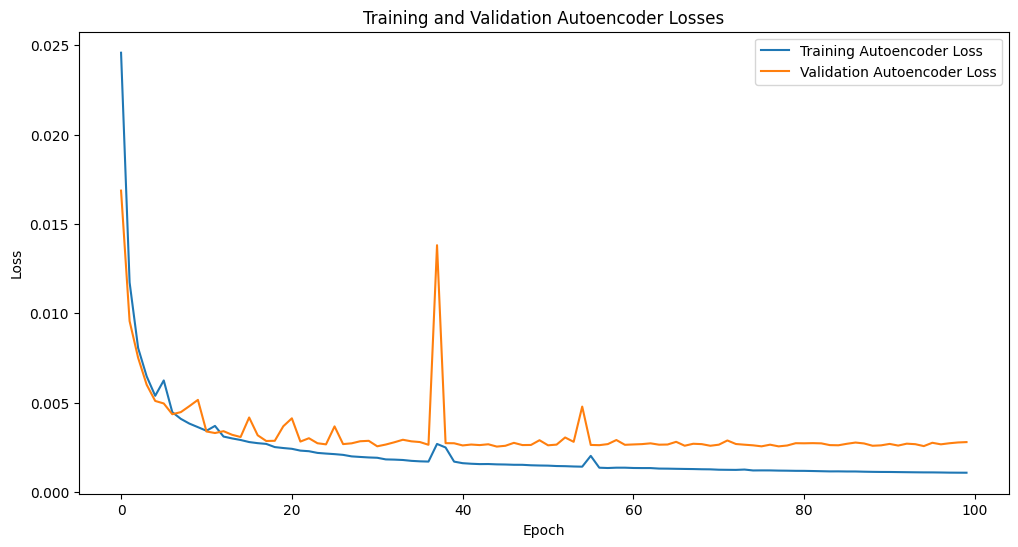

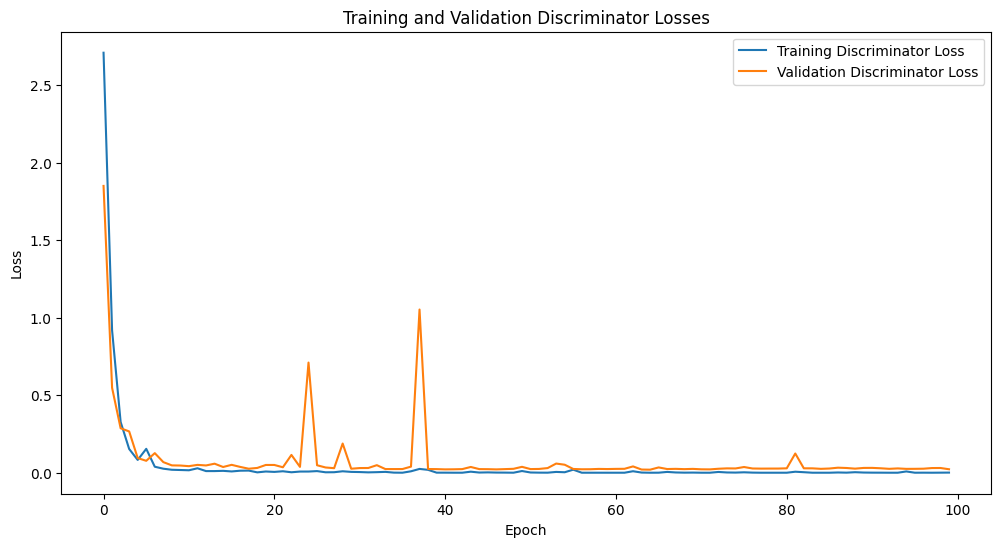

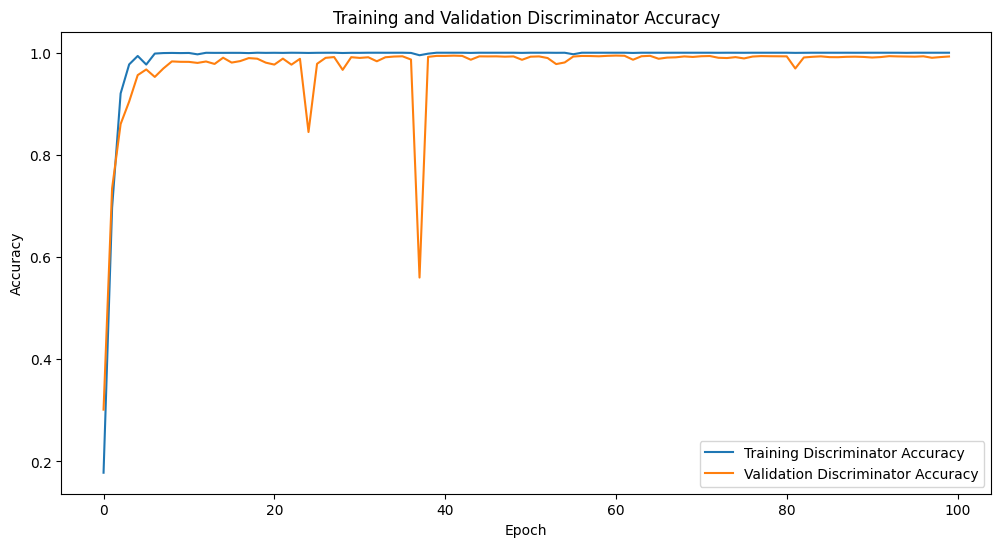

In [10]:
import matplotlib.pyplot as plt

# Plot autoencoder losses
plt.figure(figsize=(12, 6))
plt.plot(autoencoder_losses_epoch, label='Training Autoencoder Loss')
plt.plot(val_autoencoder_losses_epoch, label='Validation Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Autoencoder Losses')
plt.legend()
plt.savefig('autoencoder_losses.png')  # Save the plot as an image
plt.show()

# Plot discriminator losses
plt.figure(figsize=(12, 6))
plt.plot(discriminator_losses_epoch, label='Training Discriminator Loss')
plt.plot(val_discriminator_losses_epoch, label='Validation Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Discriminator Losses')
plt.legend()
plt.savefig('discriminator_losses.png')  # Save the plot as an image
plt.show()

# Plot discriminator accuracy
plt.figure(figsize=(12, 6))
plt.plot(discriminator_acc_epoch, label='Training Discriminator Accuracy')
plt.plot(val_discriminator_acc_epoch, label='Validation Discriminator Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Discriminator Accuracy')
plt.legend()
plt.savefig('discriminator_accuracy.png')  # Save the plot as an image
plt.show()


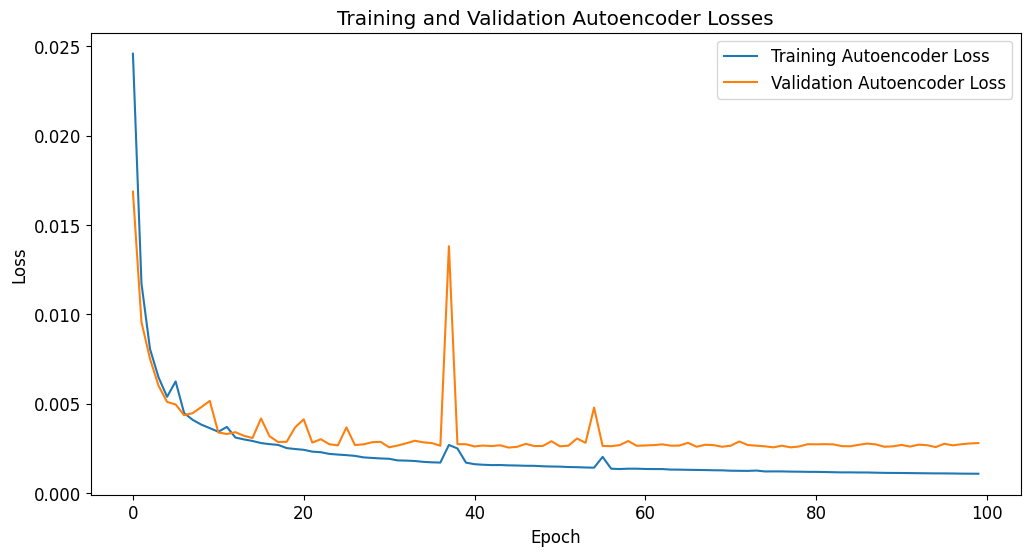

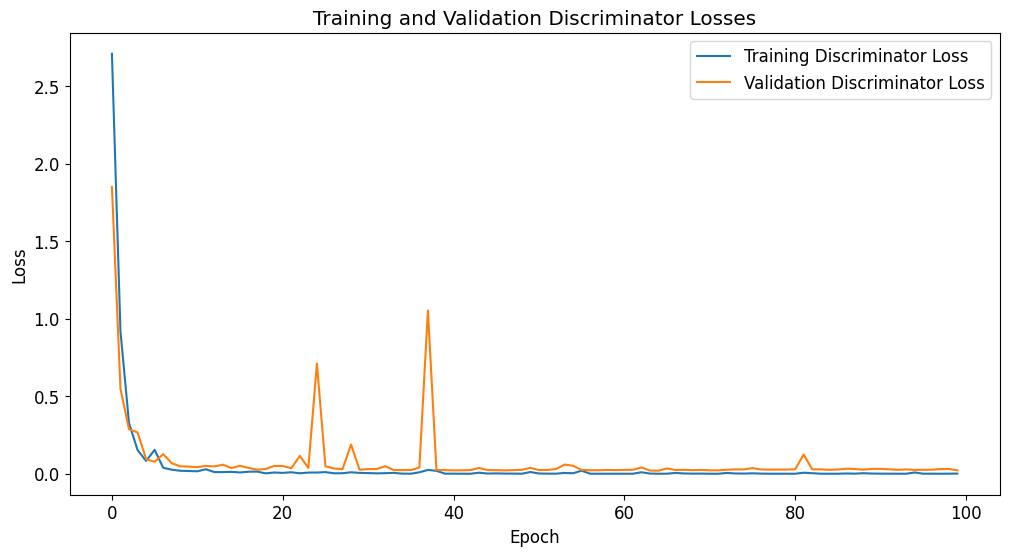

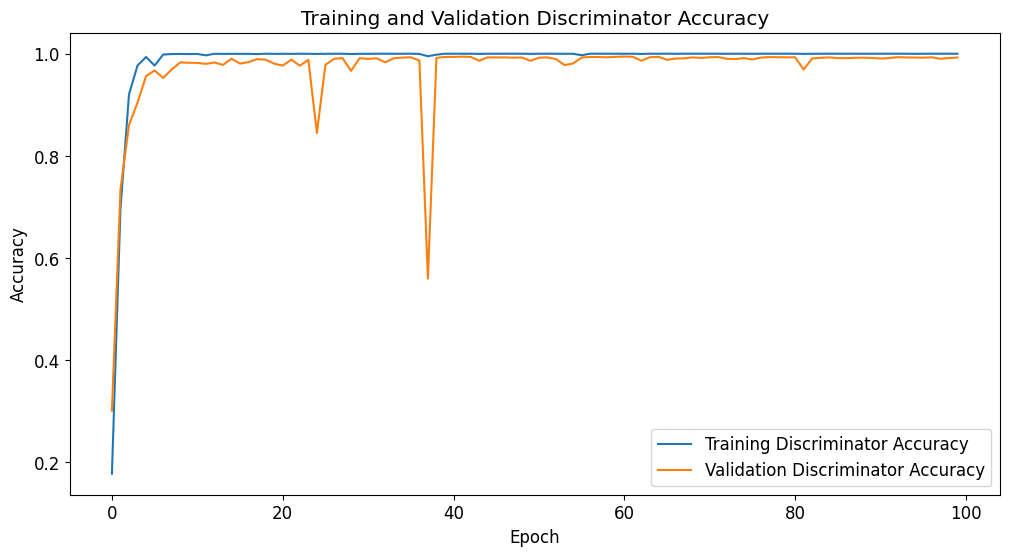

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set font properties
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12

# Plot autoencoder losses
plt.figure(figsize=(12, 6))
plt.plot(autoencoder_losses_epoch, label='Training Autoencoder Loss')
plt.plot(val_autoencoder_losses_epoch, label='Validation Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Autoencoder Losses')
plt.legend()
plt.savefig('autoencoder_losses12.png')  # Save the plot as an image
plt.show()

# Plot discriminator losses
plt.figure(figsize=(12, 6))
plt.plot(discriminator_losses_epoch, label='Training Discriminator Loss')
plt.plot(val_discriminator_losses_epoch, label='Validation Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Discriminator Losses')
plt.legend()
plt.savefig('discriminator_losses12.png')  # Save the plot as an image
plt.show()

# Plot discriminator accuracy
plt.figure(figsize=(12, 6))
plt.plot(discriminator_acc_epoch, label='Training Discriminator Accuracy')
plt.plot(val_discriminator_acc_epoch, label='Validation Discriminator Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Discriminator Accuracy')
plt.legend()
plt.savefig('discriminator_accuracy12.png')  # Save the plot as an image
plt.show()


In [12]:
# Evaluate the discriminator on the train data
result = discriminator.evaluate(train_dataset)

# Print the result
print(f'Train Result: {result}')


 12/491 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 1.0000 - loss: 1.3531e-06

I0000 00:00:1715795268.800471      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 1.0000 - loss: 2.7789e-06
Train Result: [2.931065637312713e-06, 1.0]


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Convert numerical class labels to strings
# Define the path to the test images
import pandas as pd
df = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')
test_dir = '/kaggle/input/gtsrb-german-traffic-sign/'

df['ClassId'] = df['ClassId'].astype(str)

# Define image data generator with preprocessing steps for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from dataframe to preprocess test images
test_generator = test_datagen.flow_from_dataframe(
    df,
    directory=test_dir,
    x_col='Path',
    y_col='ClassId',
    target_size=(64, 64),
    batch_size=len(df),
    class_mode='categorical',  # 'categorical' returns one-hot encoded labels
    shuffle=False  # Do not shuffle for evaluation
)

# Get preprocessed test images and labels
X_test, y_test = next(test_generator)


Found 12630 validated image filenames belonging to 43 classes.


In [14]:
#130 epoch 93 percent

In [15]:
# Evaluate the discriminator on the test data   ##100 epoch
result = discriminator.evaluate(X_test, y_test)

# Print the result
print(f'Test Result: {result}')


395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9673 - loss: 0.2128
Test Result: [0.22016431391239166, 0.966825008392334]


In [16]:
# Evaluate the discriminator on the test data   #125 epoch
result = discriminator.evaluate(X_test, y_test)

# Print the result
print(f'Test Result: {result}')


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9673 - loss: 0.2128
Test Result: [0.22016431391239166, 0.966825008392334]


In [17]:
# Evaluate the discriminator on the test data  ##145 epoch
result = discriminator.evaluate(X_test, y_test)

# Print the result
print(f'Test Result: {result}')


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9673 - loss: 0.2128
Test Result: [0.22016431391239166, 0.966825008392334]


In [18]:
import shutil
import os

# Specify the folder path
folder_path = '/kaggle/working/empty_folderf3'

# Create a zip file
shutil.make_archive(folder_path, 'zip', folder_path)

# Move the zip file to the output directory
output_path = '/kaggle/working/without_aug2.zip'
shutil.move(folder_path + '.zip', output_path)

# Display the download link
output_path
   

'/kaggle/working/without_aug2.zip'

In [19]:
discriminator.save('d_aug_valf.h5')

In [20]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming you have test data predictions stored in y_pred and true labels in y_true
y_pred = discriminator.predict(X_test)
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate precision, recall, f1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred_labels)

# Average precision, recall, f1-score across all classes
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Support:", support)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1_score)


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Precision: [1.         0.9484127  0.9984544  0.9587156  0.98104956 0.99582754
 1.         0.99526066 1.         1.         0.95041322 0.9375
 0.97631579 0.89795918 0.98275862 0.94166667 0.96103896 0.98823529
 0.91897233 0.78787879 0.52631579 0.98675497 0.97802198 0.97968397
 0.95934959 0.99628253 0.81081081 0.99526066 0.99166667 0.99230769
 0.98305085 0.92307692 0.98569385 1.         0.99843994 0.79310345
 1.         1.         0.9480315  1.         0.95936795 0.9394572
 0.96969697]
Recall: [1.         0.99583333 0.97878788 0.9952381  0.97536232 0.99444444
 0.99259259 1.         1.         0.96111111 0.88461538 1.
 0.98933333 0.97777778 0.63333333 0.94166667 0.98666667 0.93333333
 0.96875    0.86666667 0.5        0.99333333 0.98888889 0.96444444
 0.78666667 0.99259259 1.         1.         0.99166667 0.99230769
 0.96666667 1.         0.99855072 0.95555556 0.96969697 0.76666667
 0.76666667 1.         0.95555556 0.88       0.94444444 1.
 1.       